# Selección de Algoritmos a Comparar
Haremos uso de la librería Pycaret para entrenar distintos modelos en pararelo, así como pruebas con distintos datasets haciendo uso de los features que obtuvimos en el notebook anterior.

Junto con una opción uniendo todas las variables elegidas por ambos métodos.


In [62]:
select_features_by_model = {
    "lgbm" : ['24M_MONTO', 'EDAD', 'PRINCIPALIDAD_CONSUMO', 'ULTIMA_AGRUPACION', 'intentos_totales', 'max_intentos_en_un_mes', 'veces_respuesta_positiva'],
    "KBest": ['COMPETITIVIDAD', 'GENERO', 'veces_respuesta_negativa', 'Bancos_TC_Total', 'Retail_TC_Total', 'PLD_Entidades', 'Tiene_Deuda_PLD', 'dias_ultima_gestion_na', 'veces_solicitud_seguimiento_na', 'NUEVA_OFERTA']
}
col_all = list(set(select_features_by_model["lgbm"] + select_features_by_model["KBest"]  + ["target"]))

In [63]:
import pycaret
pycaret.__version__
import pandas as pd

In [64]:
# cargar el conjunto de entrenamiento y prueba con las engineered variables

# Nosotros construimos y guardamos estos conjuntos de datos en la lección anterior.
# Si no lo has hecho, revisa el NOTEBOOK anterior para saber cómo crear estos conjuntos de datos.
X_train = pd.read_parquet('../data/xtrain_postprocess.parquet')
X_test= pd.read_parquet('../data/xtest_postprocess.parquet')
# Cargar el objetivo (recuerda que el objetivo está transformado logarítmicamente).
y_train = pd.read_parquet('../data/ytrain_postprocess.parquet')
y_test = pd.read_parquet('../data/ytest_postprocess.parquet')

y_train.head()
X_train.head()

,24M_MONTO,24M_TASA,EDAD,MARCA_LABORAL,PROPENSION,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,ULTIMA_AGRUPACION,RANGO_RCI,ESTADO_CIVIL,...,dias_ultima_gestion_na,veces_sin_respuesta_na,veces_solicitud_seguimiento_na,promedio_dias_entre_gestiones_na,max_intentos_en_un_mes_na,veces_respuesta_positiva_na,veces_respuesta_negativa_na,ESTADO_TASA,ESTADO_OFERTA,NUEVA_OFERTA
0,0.316261,0.949895,0.072226,0.666667,0.0,1.0,0.333333,1.0,0.50,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0
1,0.803713,0.839976,0.358849,0.000000,1.0,1.0,0.333333,0.0,0.25,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.0
2,0.726257,0.777914,0.491479,0.000000,1.0,1.0,0.666667,0.0,0.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0
3,0.616009,0.919278,0.656332,0.666667,1.0,0.0,0.000000,0.0,0.25,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.333333,0.0
4,0.651222,1.000000,0.688743,0.666667,1.0,0.0,0.000000,1.0,0.00,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0


In [65]:
dataset_train = pd.concat([X_train , y_train] , axis=1)
dataset_train

,24M_MONTO,24M_TASA,EDAD,MARCA_LABORAL,PROPENSION,COMPETITIVIDAD,PRINCIPALIDAD_CONSUMO,ULTIMA_AGRUPACION,RANGO_RCI,ESTADO_CIVIL,...,veces_sin_respuesta_na,veces_solicitud_seguimiento_na,promedio_dias_entre_gestiones_na,max_intentos_en_un_mes_na,veces_respuesta_positiva_na,veces_respuesta_negativa_na,ESTADO_TASA,ESTADO_OFERTA,NUEVA_OFERTA,target
0,0.316261,0.949895,0.072226,0.666667,0.0,1.0,0.333333,1.0,0.50,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,0.0
1,0.803713,0.839976,0.358849,0.000000,1.0,1.0,0.333333,0.0,0.25,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0
2,0.726257,0.777914,0.491479,0.000000,1.0,1.0,0.666667,0.0,0.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0
3,0.616009,0.919278,0.656332,0.666667,1.0,0.0,0.000000,0.0,0.25,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.333333,0.0,0.0
4,0.651222,1.000000,0.688743,0.666667,1.0,0.0,0.000000,1.0,0.00,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190345,0.820246,1.000000,0.427930,0.333333,1.0,1.0,1.000000,0.0,0.25,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0
190346,0.738225,0.949895,0.309211,0.000000,1.0,1.0,0.333333,1.0,0.25,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0
190347,0.247218,0.897436,0.846618,0.000000,1.0,0.0,0.666667,0.0,1.00,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.666667,0.0,0.0
190348,0.466724,0.981340,0.967143,0.666667,1.0,1.0,0.666667,0.0,0.75,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,0.0


## Selección de Algoritmo con todos los Features Seleccionados


In [55]:
# init setup on exp
# import RegressionExperiment and init the class
from pycaret.classification  import ClassificationExperiment
ExperimentoClasificacion = ClassificationExperiment() #Instanciamos la clase
ExperimentoClasificacion.setup(dataset_train[col_all], target = 'target', session_id = 123,
                              fix_imbalance=True,
                              normalize=False,
                              use_gpu = True)
                                          #Coloco la etiqueta de mi Target, en este caso el Volumen del Tráfico
Mejores_Modelos_TOP3 =  ExperimentoClasificacion.compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7210,0.7054,0.5971,0.0056,0.0111,0.0059,0.0363,0.9340
lda,Linear Discriminant Analysis,0.7299,0.7032,0.5914,0.0057,0.0114,0.0062,0.0371,0.2900
ridge,Ridge Classifier,0.7289,0.7033,0.5886,0.0057,0.0113,0.0061,0.0366,0.2290
svm,SVM - Linear Kernel,0.7409,0.6944,0.5457,0.0055,0.0110,0.0058,0.0336,0.6860
ada,Ada Boost Classifier,0.8059,0.6940,0.4714,0.0064,0.0126,0.0075,0.0360,6.8730
gbc,Gradient Boosting Classifier,0.8983,0.6798,0.3086,0.0081,0.0157,0.0107,0.0355,23.2400
qda,Quadratic Discriminant Analysis,0.8519,0.6487,0.3029,0.0065,0.0126,0.0075,0.0253,0.2820
nb,Naive Bayes,0.9193,0.7227,0.2714,0.0090,0.0174,0.0123,0.0364,0.2260
knn,K Neighbors Classifier,0.9569,0.5269,0.0829,0.0053,0.0099,0.0050,0.0107,3.1120
et,Extra Trees Classifier,0.9894,0.5627,0.0229,0.0074,0.0112,0.0073,0.0085,1.8850


## Selección de Algoritmo con los Features de LGBM


In [56]:
# import RegressionExperiment and init the class
from pycaret.classification  import ClassificationExperiment
ExperimentoClasificacionLgbm = ClassificationExperiment() #Instanciamos la clase
ExperimentoClasificacionLgbm.setup(dataset_train[select_features_by_model["lgbm"] + ["target"]], target = 'target', session_id = 123,
                              fix_imbalance=True,
                              normalize=False,
                              use_gpu = True)
Mejores_Modelos_TOP3_lgbm =  ExperimentoClasificacion.compare_models(sort = 'Recall', n_select = 3)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(190350, 8)"
4,Transformed data shape,"(322895, 8)"
5,Transformed train set shape,"(265790, 8)"
6,Transformed test set shape,"(57105, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7210,0.7054,0.5971,0.0056,0.0111,0.0059,0.0363,0.8950
lda,Linear Discriminant Analysis,0.7299,0.7032,0.5914,0.0057,0.0114,0.0062,0.0371,0.2820
ridge,Ridge Classifier,0.7289,0.7033,0.5886,0.0057,0.0113,0.0061,0.0366,0.2240
svm,SVM - Linear Kernel,0.7409,0.6944,0.5457,0.0055,0.0110,0.0058,0.0336,0.6720
ada,Ada Boost Classifier,0.8059,0.6940,0.4714,0.0064,0.0126,0.0075,0.0360,6.6530
gbc,Gradient Boosting Classifier,0.8983,0.6798,0.3086,0.0081,0.0157,0.0107,0.0355,22.9490
qda,Quadratic Discriminant Analysis,0.8519,0.6487,0.3029,0.0065,0.0126,0.0075,0.0253,0.2810
nb,Naive Bayes,0.9193,0.7227,0.2714,0.0090,0.0174,0.0123,0.0364,0.2290
knn,K Neighbors Classifier,0.9569,0.5269,0.0829,0.0053,0.0099,0.0050,0.0107,3.0750
et,Extra Trees Classifier,0.9894,0.5627,0.0229,0.0074,0.0112,0.0073,0.0085,1.8960


## Selección de Algoritmo con los Features de Kbest


In [57]:
# import RegressionExperiment and init the class
from pycaret.classification  import ClassificationExperiment
ExperimentoClasificacion_KBest = ClassificationExperiment() #Instanciamos la clase
ExperimentoClasificacion_KBest.setup(dataset_train[select_features_by_model["KBest"] + ["target"]], target = 'target', session_id = 123,
                              fix_imbalance=True,
                              normalize=False,
                              use_gpu = True)
Mejores_Modelos_TOP3_KBest =  ExperimentoClasificacion_KBest.compare_models(sort = 'Recall', n_select = 3)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(190350, 11)"
4,Transformed data shape,"(322895, 11)"
5,Transformed train set shape,"(265790, 11)"
6,Transformed test set shape,"(57105, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6149,0.6639,0.6343,0.0050,0.0100,0.0048,0.0300,0.2020
lr,Logistic Regression,0.6802,0.6780,0.6114,0.0050,0.0099,0.0048,0.0320,0.3030
ridge,Ridge Classifier,0.6847,0.6779,0.6086,0.0051,0.0100,0.0048,0.0323,0.1810
lda,Linear Discriminant Analysis,0.6846,0.6779,0.6086,0.0051,0.0100,0.0048,0.0323,0.2120
nb,Naive Bayes,0.6716,0.6476,0.5886,0.0047,0.0093,0.0041,0.0284,0.1780
svm,SVM - Linear Kernel,0.7316,0.6693,0.5600,0.0055,0.0108,0.0057,0.0337,0.3910
ada,Ada Boost Classifier,0.7303,0.6668,0.5343,0.0052,0.0103,0.0051,0.0306,3.2310
gbc,Gradient Boosting Classifier,0.7915,0.6496,0.4457,0.0056,0.0111,0.0059,0.0299,5.8790
dt,Decision Tree Classifier,0.7939,0.6099,0.4029,0.0051,0.0101,0.0050,0.0250,0.2510
rf,Random Forest Classifier,0.7947,0.6087,0.4029,0.0051,0.0102,0.0050,0.0251,1.2500


# Selección de Algoritmo Final
Procederemos a utilizar los siguientes algoritmos:
- Regresión Logistica
- Clasificador de Ridge
- SVM - Linear Kernel

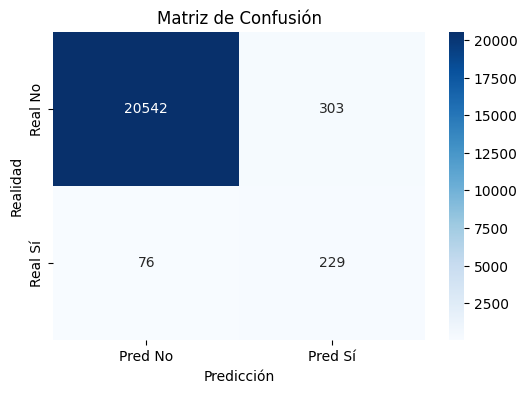

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir métricas extraídas de la imagen
accuracy = 0.70988
f1_score = 0.01446
precision = 0.00730
recall = 0.75
total_observations = 21150

# Calcular TP, FN, FP, TN en base a las métricas dadas y las observaciones totales
TP = int(recall * f1_score * total_observations)
FN = int((1 - recall) * f1_score * total_observations)
FP = int(((1 - precision) * f1_score * total_observations))
TN = total_observations - (TP + FN + FP)

# Crear matriz de confusión
cm = np.array([[TN, FP], [FN, TP]])

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred No", "Pred Sí"], yticklabels=["Real No", "Real Sí"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()
